# Predicting Car Prices

Let's practice the machine learning workflow to predict's a car's market price using its attributes. For each car in our dataset, we have information about the technical aspects of the vehicle, such as the weight of the car, the miles per gallon, the acceleration, etc. Our goal is to identify which of the attributes, or combination, is most helpful in predicting the price of a car. 

## Data Set
We'll be working with the [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/automobile) from the UCI Machine Learning Repo. 

In [62]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14,
    linewidth=4
    )


%matplotlib inline


In [4]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

In [5]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

The target column is ```Price```. 

The columns that are numeric are ```symboling```, ```wheel-base```, ```length```, ```width```, ```curb-weight```, ```engine-size```, ```compression-rate```, ```city-mpg```, and ```highway-mpg```. 

The are no missing values in any columns, though we note that in ```normalized-losses``` shown using ```cars.head()``` the first three values are *?*, so we should be careful of missing values that are represented using other symbols. 

## Data Cleaning

Since we already noticed the data issue in the ```normalized-losses``` column, let's replace the *?* with a NaN. This might occur in other columns, so if we do this replacement across the whole dataframe, this can let us know which columns actually do have missing values. 

Let's also rescale the values in the numeric columns so they all range from 0 to 1. 

In [7]:
# replace ? values with NaN
cars.replace('?',np.nan,inplace=True)

In [8]:
# let's confirm this worked
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
# we are only going to focus on continuous numeric data for
# this project, so let's select only those columns

continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]


In [10]:
# and now let's convert all columns to float
# and check for missing values

numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [11]:
numeric_cars.shape

(205, 15)

Since ```price``` is our target value, we will remove the rows with missing values. Then we will make decisions about the other values. We only have 205 rows, so want to preserve as much data as we can.

In [12]:
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()


normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [13]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())


In [14]:
# confirm that we have no missing values
numeric_cars.isnull().sum()


normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [15]:
# finally, let's normalize all of the columns so all values
# are between 0 and 1. Except for the Price columns. 

price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col


## Univariate Model

Let's start with a simple univariate model. We will then use this to understand the features better when we build our multivariate model.

Let's write a function that does the training and simple validation process. 

In [16]:
def knn_train_test(df,training_col,target_col,k):
    # initialize the model and the folding for the 
    # cross validation
    
    knn = KNeighborsRegressor(n_neighbors = k)
    
    kf = KFold(n_splits = 5, shuffle=True,random_state=1)

    # if we only want to check one column, we need to 
    # convert it to a list
    if isinstance(training_col,str):
        training_col = [training_col]

        
    # use cross validation to determine the mse
    mses = cross_val_score(knn,
                       df[training_col],
                       df[target_col],
                       scoring='neg_mean_squared_error',
                       cv=kf)

    rmse = np.sqrt(np.absolute(np.mean(mses)))
    # return RMSE
    return(rmse)
    

In [17]:
# create list of columns, except price
column_list = numeric_cars.columns.tolist()
column_list.remove('price')

rmse_results = {}

for x in column_list:
    rmse = knn_train_test(numeric_cars,x,'price',5)
    rmse_results[x] = rmse
    
    
# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()


engine-size          3179.543089
horsepower           3814.462536
highway-mpg          4157.845674
width                4241.596173
curb-weight          4425.283595
city-mpg             4502.911460
length               5853.976896
wheel-base           6155.802659
compression-rate     6417.033070
bore                 6861.308112
normalized-losses    7099.543747
stroke               7134.774703
peak-rpm             7599.439471
height               7618.695942
dtype: float64

In [18]:
# now let's try differnt values for k

k_values = [1,3,5,7,9]

different_k=pd.DataFrame(columns=['feature','k_value','rmse'])


for col in column_list:
    for k_value in k_values:
        rmse = knn_train_test(numeric_cars,col,'price',k_value)
        different_k = different_k.append({'feature' : col,
                                      'k_value' : k_value,
                                      'rmse' : rmse},
                                     ignore_index=True
                                    )
 




In [29]:
different_k.groupby('feature')

In [32]:
test_df = different_k.groupby('feature')
test_df.head()


,feature,k_value,rmse
0,normalized-losses,1,8998.109141
1,normalized-losses,3,6960.539760
2,normalized-losses,5,7099.543747
3,normalized-losses,7,7582.496574
4,normalized-losses,9,7735.700913
...,...,...,...
65,highway-mpg,1,5823.790143
66,highway-mpg,3,4610.768603
67,highway-mpg,5,4157.845674
68,highway-mpg,7,4353.745355


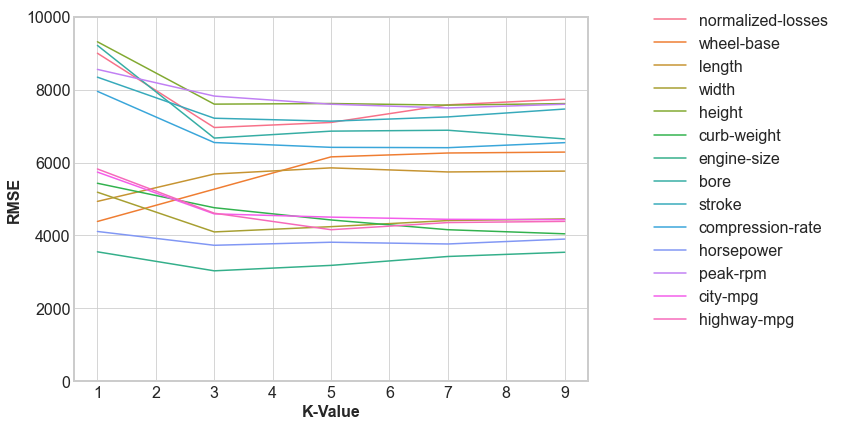

In [45]:
plt.figure(figsize=(12,6))

sns.lineplot(data=different_k,
            x='k_value',
            y='rmse',
            hue='feature')


plt.legend(fontsize=16,bbox_to_anchor=(1.1,1.05))
plt.xticks(fontsize=16)
plt.yticks([0,2000,4000,6000,8000,10000],fontsize=16)
plt.xlabel('K-Value',fontsize=16)
plt.ylabel('RMSE',fontsize=16)


plt.show()



## Multivariate Model

Now, let's run some multivariate models so we can include multiple features.

In [22]:
numeric_cars.columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [23]:
cols_to_include = ['length','wheel-base']



best_two = ['engine-size','horsepower']
best_three = ['engine-size','horsepower','highway-mpg']
best_four = ['engine-size','horsepower','highway-mpg','width']
best_five = ['engine-size','horsepower','highway-mpg','width','curb-weight']


#rmse = knn_train_test(numeric_cars,cols_to_include,'price',5)
#rmse

print('Best two RMSE: ', knn_train_test(numeric_cars,best_two,'price',5))
print('Best three RMSE: ', knn_train_test(numeric_cars,best_three,'price',5))
print('Best four RMSE: ', knn_train_test(numeric_cars,best_four,'price',5))
print('Best five RMSE: ', knn_train_test(numeric_cars,best_five,'price',5))


Best two RMSE:  2994.872803943433
Best three RMSE:  2862.3844982947435
Best four RMSE:  3166.609293352488
Best five RMSE:  3159.706008992516


## Hyperparamater Tuning

Let's now optimize the models that performed the best in the previous step. We'll adjust the k value, the number of neighbors, from 1 to 25 for the three best models from above. 

In [24]:
# set up list of k-values
k_values = [x for x in range(1,26)]


In [25]:
# two features (engine-size and horsepower)

two_features_k=pd.DataFrame(columns=['k_value','rmse'])


for k_value in k_values:
    rmse = knn_train_test(numeric_cars,best_two,'price',k_value)
    two_features_k = two_features_k.append({'k_value':k_value,
                                           'rmse':rmse},
                                          ignore_index=True)

#two_features_k    
    

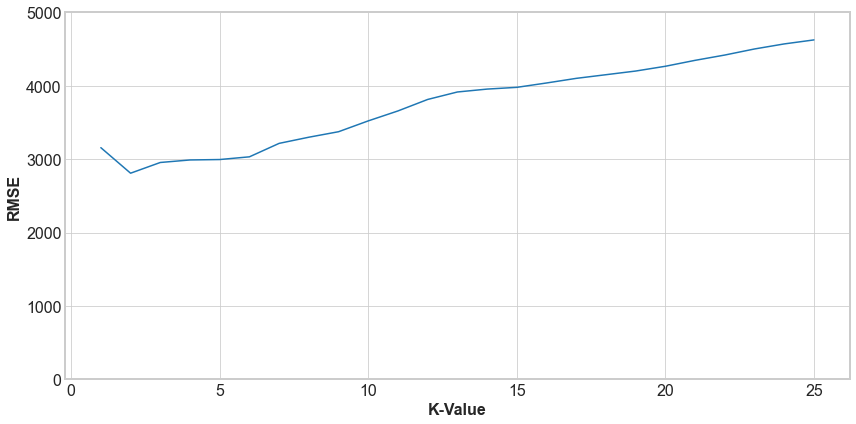

In [46]:
plt.figure(figsize=(12,6))

sns.lineplot(data=two_features_k,x='k_value',y='rmse')


plt.xticks(fontsize=16)
plt.yticks([0,1000,2000,3000,4000,5000],fontsize=16)
plt.xlabel('K-Value',fontsize=16)
plt.ylabel('RMSE',fontsize=16)

plt.show()

In [27]:
# three features (engine-size and horsepower and highway-mpg)

three_features_k=pd.DataFrame(columns=['k_value','rmse'])


for k_value in k_values:
    rmse = knn_train_test(numeric_cars,best_three,'price',k_value)
    three_features_k = three_features_k.append({'k_value':k_value,
                                           'rmse':rmse},
                                          ignore_index=True)


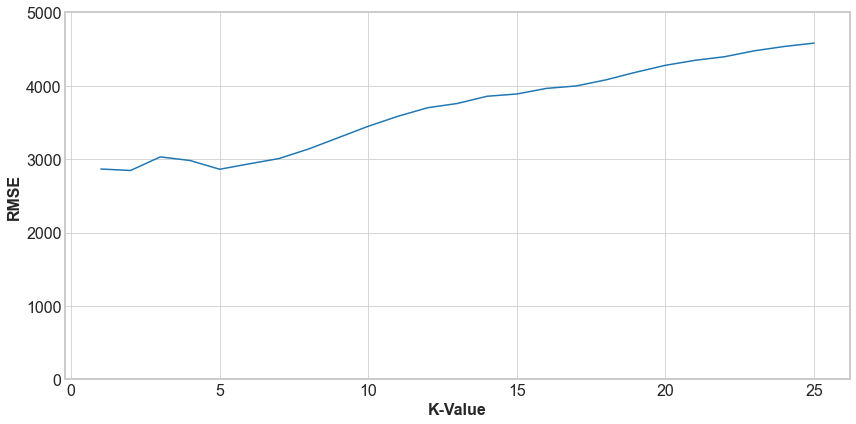

In [47]:
plt.figure(figsize=(12,6))

sns.lineplot(data=three_features_k,x='k_value',y='rmse')


plt.xticks(fontsize=16)
plt.yticks([0,1000,2000,3000,4000,5000],fontsize=16)
plt.xlabel('K-Value',fontsize=16)
plt.ylabel('RMSE',fontsize=16)

plt.show()

In [28]:
# five features (engine-size and horsepower and highway-mpg
# and width and curb-weight)

five_features_k=pd.DataFrame(columns=['k_value','rmse'])


for k_value in k_values:
    rmse = knn_train_test(numeric_cars,best_five,'price',k_value)
    five_features_k = five_features_k.append({'k_value':k_value,
                                           'rmse':rmse},
                                          ignore_index=True)


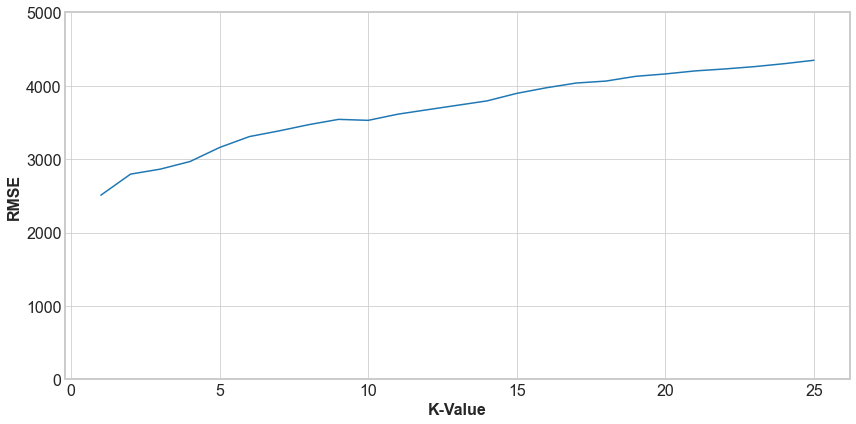

In [48]:
plt.figure(figsize=(12,6))

sns.lineplot(data=five_features_k,x='k_value',y='rmse')


plt.xticks(fontsize=16)
plt.yticks([0,1000,2000,3000,4000,5000],fontsize=16)
plt.xlabel('K-Value',fontsize=16)
plt.ylabel('RMSE',fontsize=16)

plt.show()

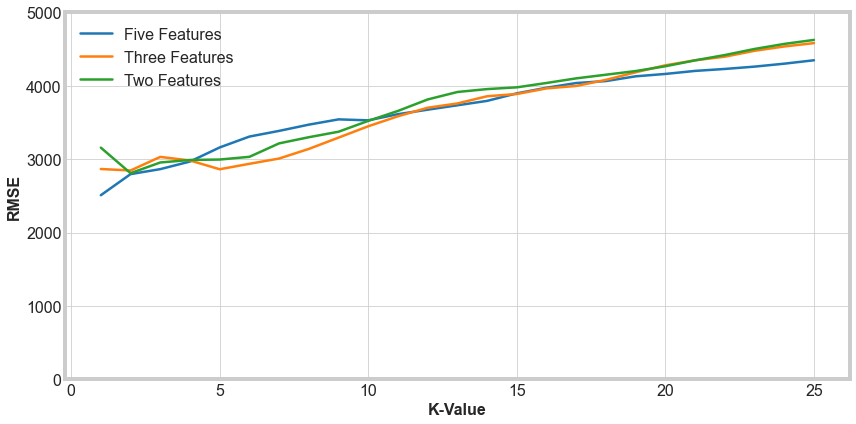

In [61]:
plt.figure(figsize=(12,6))

sns.lineplot(data=five_features_k,x='k_value',y='rmse',label='Five Features',linewidth=2.5)
sns.lineplot(data=three_features_k,x='k_value',y='rmse',label='Three Features',linewidth=2.5)
sns.lineplot(data=two_features_k,x='k_value',y='rmse',label='Two Features',linewidth=2.5)

plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks([0,1000,2000,3000,4000,5000],fontsize=16)
plt.xlabel('K-Value',fontsize=16)
plt.ylabel('RMSE',fontsize=16)

plt.show()

For the multivariate models, we see that the K-value we choose should be less than about 5. A k-value of 1 produces the least error for the Five features and Three features set. But a value of 1 would be prone to large errors for unusual cars, so we should avoid that. A value of 2 is most consistent for the lowest RMSE. There is only a small difference between the different models for k = 2. Five features has a slightly smaller error, and should perform better on outliers, so we would suggest using k = 2 with the five features we have used here. 